In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import json

with open('ini/mysql_local.json', 'r') as file:
 config_str = file.read()

config = json.loads(config_str)

import pymysql

conn = pymysql.connect(
 host = config['host'],
 user = config['user'],
 password = config['password'],
 database = config['database'],
 port = config['port']
)


In [ ]:
cur = conn.cursor()

In [12]:
# 월별 매출/이익
sql_table = '''
    SELECT 	MID(kk.sdate,1,7) s_month
                , sum(jj.pprice)			AS '매출'
                , sum(jj.pprice - jj.pcost) 	AS '이익'
    FROM sales	kk
    JOIN products jj
    ON 	kk.spid = jj.pid
    GROUP BY MID(kk.sdate,1,7);
'''
cur.execute(sql_table)
rows = cur.fetchall();
rows

(('2020-01', 383700.0, 124000.0),
 ('2020-02', 4049800.0, 1188600.0),
 ('2020-03', 6402000.0, 1706400.0),
 ('2020-04', 8047800.0, 1742400.0),
 ('2020-05', 4928600.0, 1309100.0),
 ('2020-06', 8092500.0, 1981200.0),
 ('2020-07', 3023300.0, 803400.0),
 ('2020-08', 1002700.0, 284000.0),
 ('2020-09', 3648900.0, 1228200.0),
 ('2020-10', 5778900.0, 1876200.0),
 ('2020-11', 414600.0, 188300.0),
 ('2020-12', 6696600.0, 1563600.0))

In [13]:
# 거래처별 매출/이익
sql_table = '''
SELECT 	kk.scompany
			, sum(jj.pprice)			AS '매출'
			, sum(jj.pprice - jj.pcost) 	AS '이익'
FROM sales	kk
JOIN products jj
ON 	kk.spid = jj.pid
GROUP BY kk.scompany;
'''
cur.execute(sql_table)
rows = cur.fetchall();
rows

(('롯데건설', 3087700.0, 1080000.0),
 ('포스코건설', 10611400.0, 3024200.0),
 ('현대산업개발', 8826900.0, 2514400.0),
 ('한국공항공사', 17426600.0, 4024400.0),
 ('조달청', 8495100.0, 2539800.0),
 ('삼성물산', 4021700.0, 812600.0))

In [14]:
# 거래처별 판매제품 및 수량
sql_table = '''
SELECT 	kk.scompany
			,jj.pname			AS '판매제품'
			,SUM(kk.sunit)		AS '수량'
FROM sales	kk
JOIN products jj
ON 	kk.spid = jj.pid
GROUP BY kk.scompany, kk.spid;
'''
cur.execute(sql_table)
rows = cur.fetchall();
rows

(('롯데건설', '워시팝피치핑크', Decimal('9')),
 ('롯데건설', '와인잔거치대', Decimal('2')),
 ('롯데건설', '미러볼라이트', Decimal('13')),
 ('롯데건설', '스마트폰거치대', Decimal('1')),
 ('롯데건설', '스니커즈', Decimal('3')),
 ('포스코건설', '무지셔츠', Decimal('22')),
 ('포스코건설', '식기세트', Decimal('18')),
 ('포스코건설', '벨트', Decimal('18')),
 ('포스코건설', '선글라스', Decimal('29')),
 ('포스코건설', '퍼퓸샴푸', Decimal('14')),
 ('현대산업개발', '블루투스키보드', Decimal('1')),
 ('현대산업개발', '스니커즈', Decimal('4')),
 ('현대산업개발', '퍼퓸샴푸', Decimal('24')),
 ('현대산업개발', '무지셔츠', Decimal('15')),
 ('현대산업개발', '워시팝코코넛화이트', Decimal('13')),
 ('현대산업개발', '구공향로', Decimal('14')),
 ('현대산업개발', '손세정디스펜서', Decimal('19')),
 ('현대산업개발', '트리코트자켓', Decimal('4')),
 ('현대산업개발', '닥터하우스웜스텐우드', Decimal('10')),
 ('한국공항공사', '팔성화로', Decimal('13')),
 ('한국공항공사', '블루투스턴테이블', Decimal('11')),
 ('한국공항공사', '냉풍시트', Decimal('4')),
 ('한국공항공사', '블루투스키보드', Decimal('15')),
 ('한국공항공사', '마스크', Decimal('15')),
 ('조달청', '등산벨트', Decimal('6')),
 ('조달청', '고속멀티충전기', Decimal('15')),
 ('조달청', '무지셔츠', Decimal('9')),
 ('조달청', '로봇청소기', Decimal(

In [15]:
# 제품별 판매수량/매출/이익
sql_table = '''
SELECT 	jj.pname
			, SUM(kk.sunit)		AS '수량'
			, sum(jj.pprice)			AS '매출'
			, sum(jj.pprice - jj.pcost) 	AS '이익'
FROM sales	kk
JOIN products jj
ON 	kk.spid = jj.pid
GROUP BY kk.spid;
'''
cur.execute(sql_table)
rows = cur.fetchall();
rows

(('워시팝피치핑크', Decimal('22'), 950000.0, 450000.0),
 ('와인잔거치대', Decimal('57'), 383900.0, 110000.0),
 ('미러볼라이트', Decimal('52'), 169000.0, 40000.0),
 ('스마트폰거치대', Decimal('28'), 153300.0, 63000.0),
 ('스니커즈', Decimal('22'), 840000.0, 77000.0),
 ('무지셔츠', Decimal('50'), 178400.0, 36000.0),
 ('식기세트', Decimal('40'), 990000.0, 306000.0),
 ('벨트', Decimal('38'), 250000.0, 81000.0),
 ('선글라스', Decimal('69'), 1792000.0, 1317400.0),
 ('퍼퓸샴푸', Decimal('57'), 253000.0, 50600.0),
 ('블루투스키보드', Decimal('19'), 162000.0, 12500.0),
 ('워시팝코코넛화이트', Decimal('33'), 1330000.0, 630000.0),
 ('구공향로', Decimal('40'), 811800.0, 163800.0),
 ('손세정디스펜서', Decimal('60'), 643500.0, 75000.0),
 ('트리코트자켓', Decimal('40'), 1352000.0, 969600.0),
 ('닥터하우스웜스텐우드', Decimal('51'), 1300000.0, 650000.0),
 ('팔성화로', Decimal('41'), 973000.0, 366800.0),
 ('블루투스턴테이블', Decimal('36'), 3000000.0, 510000.0),
 ('냉풍시트', Decimal('8'), 258000.0, 160000.0),
 ('마스크', Decimal('47'), 88200.0, 16200.0),
 ('등산벨트', Decimal('33'), 133000.0, 94500.0),
 ('고속멀티충전기

In [43]:
# 카테고리별 매출/이익 표 및 그래프
sql_table = '''
SELECT 		MID(kk.sdate,1,7)			
			, sum(jj.pprice)			AS '매출'
			, sum(jj.pprice - jj.pcost) 	AS '이익'
FROM sales	kk
JOIN products jj
ON 	kk.spid = jj.pid
GROUP BY MID(kk.sdate,1,7);
'''
cur.execute(sql_table)
rows = cur.fetchall();
rows

(('2020-01', 383700.0, 124000.0),
 ('2020-02', 4049800.0, 1188600.0),
 ('2020-03', 6402000.0, 1706400.0),
 ('2020-04', 8047800.0, 1742400.0),
 ('2020-05', 4928600.0, 1309100.0),
 ('2020-06', 8092500.0, 1981200.0),
 ('2020-07', 3023300.0, 803400.0),
 ('2020-08', 1002700.0, 284000.0),
 ('2020-09', 3648900.0, 1228200.0),
 ('2020-10', 5778900.0, 1876200.0),
 ('2020-11', 414600.0, 188300.0),
 ('2020-12', 6696600.0, 1563600.0))

In [4]:


df = pd.DataFrame(rows, columns = ['월','매출','이익'])
df.set_index('월', inplace = True)

df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

NameError: name 'rows' is not defined

In [46]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]

In [47]:
tdf

월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,계
매출,383700,4049800,6402000,8047800,4928600,8092500,3023300,1002700,3648900,5778900,414600,6696600,52469400
이익,124000,1188600,1706400,1742400,1309100,1981200,803400,284000,1228200,1876200,188300,1563600,13995400


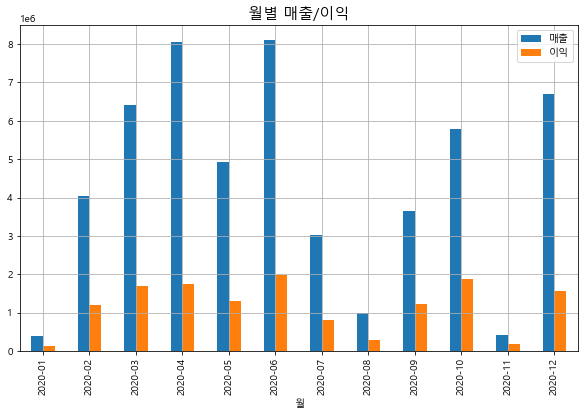

In [51]:
df.plot.bar(figsize=(10,6))
plt.title("월별 매출/이익", size=15)
plt.grid()
plt.show()

In [3]:
import db_manage as dm

In [6]:
# 소수점 자리 제한을 위한 코드
pd.options.display.float_format = '{:.2}'.format

In [ ]:
results = dm.get_data_by_company(config)
df = pd.DataFrame(results, columns=['판매처','매출','이익'])
df.set_index('판매처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

In [ ]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

In [ ]:
df['이익율'].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 이익율(%)', size=15)
plt.grid()
plt.show()

## 3. 거래처별 판매상품 및 수량

In [4]:
results = dm.get_products_by_company(config)
df = pd.DataFrame(results, columns=['판매처','상품','수량'])
df.set_index(['판매처','상품'], inplace=True)
df['수량'] = df.수량.astype(int)
df

,,수량
판매처,상품,
현대산업개발,마스크,266
삼성물산,클리너,700
롯데건설,와그너스틸안경,293
조달청,바디스파,613
한국공항공사,시네마빔프로젝터,334
포스코건설,고속멀티충전기,300


In [5]:
df.reset_index()['판매처'].unique()

array(['현대산업개발', '삼성물산', '롯데건설', '조달청', '한국공항공사', '포스코건설'], dtype=object)

<ipython-input-6-cb32743fb563>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  sdf=df.loc[(company,)]


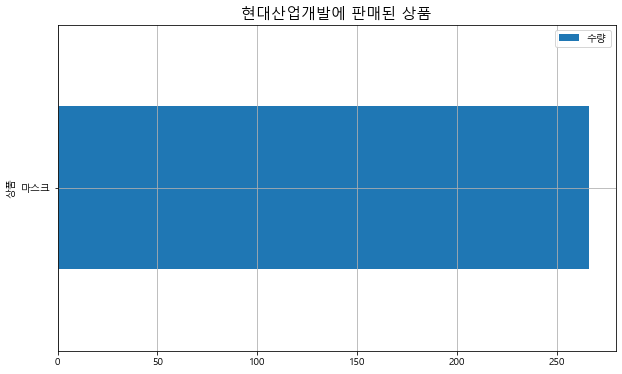

<ipython-input-6-cb32743fb563>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  sdf=df.loc[(company,)]


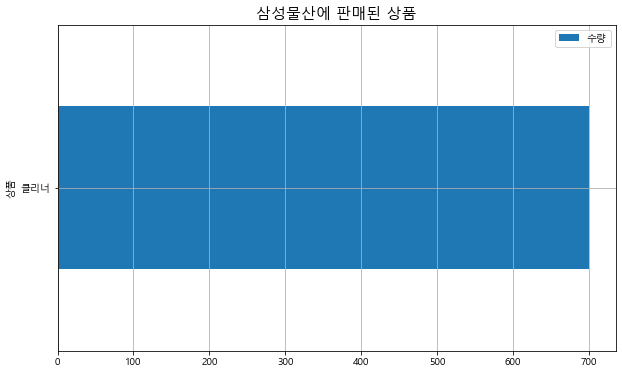

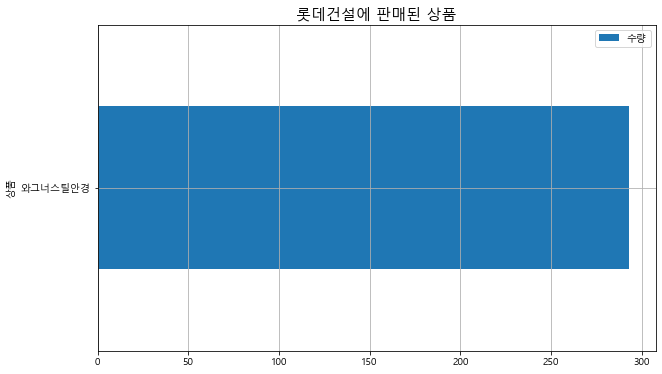

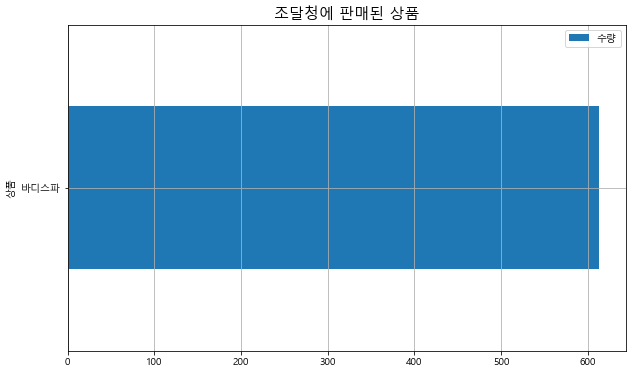

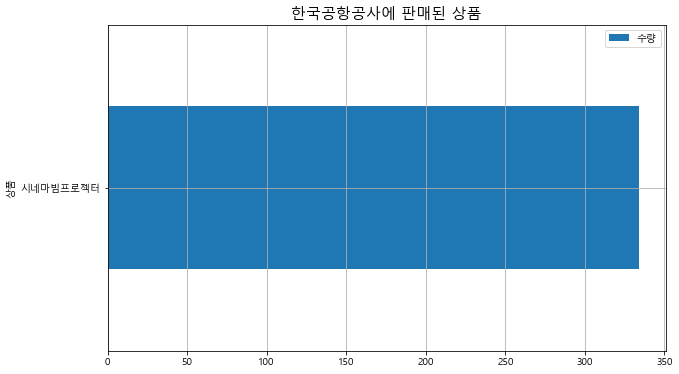

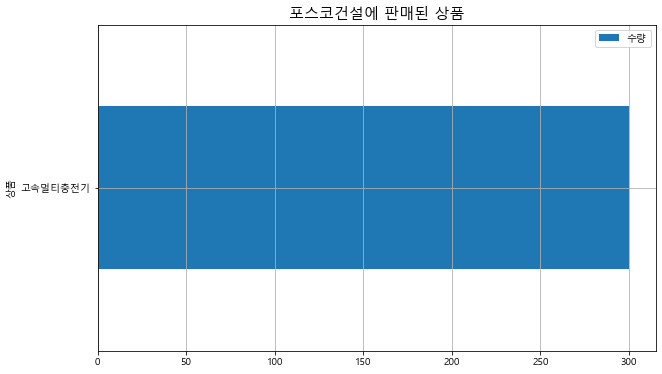

In [6]:
for company in df.reset_index()['판매처'].unique():
    sdf=df.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

## 4. 제품별 판매수량/매출/이익

In [4]:
results = dm.get_data_by_products(config)
df = pd.DataFrame(results, columns=['상품','수량','매출','이익'])
df.set_index('상품', inplace=True)
df['수량'] = df.수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,수량,매출,이익
상품,,,
마스크,77,137200,25200
노이즈캔슬링이어폰,77,6282000,1063800
무지셔츠,62,267600,54000
지샥머드마스터,53,4290000,1320000
스마트폰거치대,87,394200,162000
클리너,70,156000,27300
벨트,44,250000,81000
고속멀티충전기,81,825000,376500
텀블러,90,318400,160000


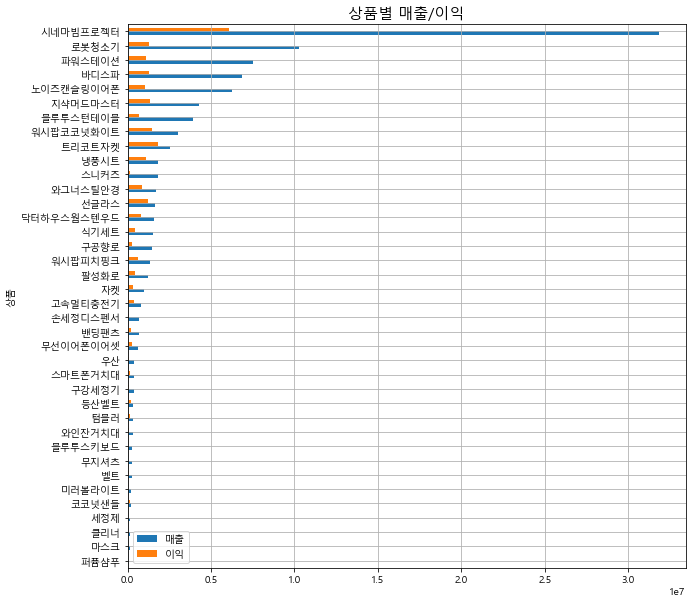

In [5]:
df[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title('상품별 매출/이익', size=15)
plt.grid()
plt.show()

## 5. 카테고리별 매출/이익

In [4]:
results = dm.get_data_by_category(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
카테고리,,,
패션,14824300,6515800,43.953509
테크,65067000,12377900,19.023314
라이프,18498300,5731900,30.986091


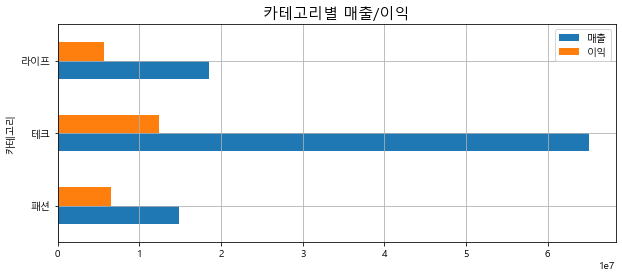

In [5]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 매출/이익', size=15)
plt.grid()
plt.show()

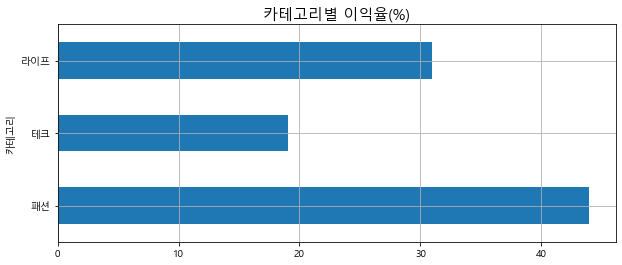

In [6]:
df['이익율'].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 이익율(%)', size=15)
plt.grid()
plt.show()

In [7]:
cur.close()
conn.close()

NameError: name 'cur' is not defined